In [54]:
import numpy as np
import pandas as pd
from datetime import datetime,date

import missingno as msno

# import warnings
# warnings.filterwarnings("ignore")

### **A) Coleta dos Dados de Precipitação (chuva)**

In [1]:
# source_file = '../../Data/raw/t2m/teste.txt'
source_file = '../../Data/raw/prec/precNE_2017_01.txt'
output_file = '../../Data/process/result_precNE_2017_01.txt'

In [31]:
# DADOS OBSERVADOS
df_temperatura = pd.read_csv(source_file, delimiter = r"\s+", header=None)

#### <span style="color:#DC143C">**A1.Formato dos Dados**

In [32]:
df_temperatura.shape # formato da matriz

(2047, 746)

#### <span style="color:#DC143C">**A2.Visao do Dataframe**

In [33]:
df_temperatura.head(2)  # visão de 5 linhas

,0,1,2,3,4,5,6,7,8,9,...,736,737,738,739,740,741,742,743,744,745
0,-46.00,-1.25,27.18,27.23,27.21,26.19,26.17,25.81,25.72,25.51,...,27.27,26.65,26.45,26.34,26.14,25.95,26.13,25.41,25.26,25.38
1,-45.75,-1.25,27.54,27.64,27.73,27.00,27.04,26.89,26.90,26.72,...,26.74,26.52,25.85,26.13,25.57,25.82,25.88,25.59,25.47,25.68


#### <span style="color:#DC143C">**A3. Nome das Colunas do Cabeçalho**

In [34]:
# Lista o nome das Colunas
df_temperatura.columns 

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            736, 737, 738, 739, 740, 741, 742, 743, 744, 745],
           dtype='int64', length=746)

#### <span style="color:#DC143C">**A4. Conteúdo de 1 Linha**

In [ ]:
df_temperatura.values[0:1]

#### <span style="color:#DC143C">**A5. Informações Sobre o Dataframe**

In [36]:
df_temperatura.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2047 entries, 0 to 2046
Columns: 746 entries, 0 to 745
dtypes: float64(746)
memory usage: 11.7 MB


In [37]:
# Descreve apenas colunas "Numericas"
df_temperatura.describe(include=[np.number])

,0,1,2,3,4,5,6,7,8,9,...,736,737,738,739,740,741,742,743,744,745
count,2047.000000,2047.000000,2047.00000,2047.000000,2047.000000,2047.000000,2047.000000,2047.000000,2047.000000,2047.000000,...,2047.000000,2047.000000,2047.000000,2047.000000,2047.00000,2047.000000,2047.000000,2047.000000,2047.000000,2047.000000
mean,-41.728261,-8.631900,27.32172,27.093713,26.603004,24.934294,24.537811,24.247044,23.833376,23.563366,...,27.771285,31.541231,31.742418,31.810616,31.60639,31.402633,31.226634,29.850537,27.158671,26.910689
std,3.087448,3.606967,2.66034,2.777473,2.751419,2.725959,2.629831,2.797433,2.678827,2.652277,...,1.584258,2.281480,2.495736,2.527772,2.77285,2.838418,2.848802,2.755342,2.039351,2.029772
min,-48.250000,-18.250000,20.61000,19.890000,19.390000,17.670000,16.820000,15.790000,15.670000,15.340000,...,21.820000,25.660000,25.560000,25.680000,23.62000,22.630000,23.210000,24.320000,22.470000,22.360000
25%,-44.250000,-11.250000,25.43500,25.085000,24.625000,23.050000,22.710000,22.315000,22.120000,21.935000,...,26.825000,29.720000,29.790000,29.900000,29.41000,29.055000,28.845000,27.585000,25.640000,25.425000
50%,-41.750000,-8.250000,27.35000,27.240000,26.800000,25.040000,24.830000,24.700000,24.340000,24.120000,...,27.720000,31.390000,31.710000,31.730000,31.43000,31.220000,31.100000,29.430000,26.670000,26.410000
75%,-39.500000,-5.750000,29.18000,28.950000,28.445000,26.890000,26.390000,26.170000,25.665000,25.390000,...,28.800000,33.370000,33.645000,33.845000,33.86500,33.720000,33.455000,32.000000,28.510000,28.110000
max,-35.000000,-1.250000,35.08000,34.490000,33.770000,32.000000,31.440000,31.390000,30.610000,30.150000,...,32.710000,37.180000,37.640000,37.470000,37.87000,37.680000,37.830000,36.420000,33.140000,33.430000


#### <span style="color:#DC143C">**A6. Quantidade de valores não nulos**

In [38]:
df_temperatura.count()

0      2047
1      2047
2      2047
3      2047
4      2047
       ... 
741    2047
742    2047
743    2047
744    2047
745    2047
Length: 746, dtype: int64

#### <span style="color:#DC143C">**A7. Quantidade de valores NULOS**

<p>Exemplo:<br> 
<b>rain.isnull()</b>  # O conteúdo da campo onde está NULL recebe o valor FALSE, senão TRUE <br>
<b>rain.isnull().sum()</b>  # Totaliza os conteudos não NULL por coluna

In [39]:
df_temperatura.isnull().sum()

0      0
1      0
2      0
3      0
4      0
      ..
741    0
742    0
743    0
744    0
745    0
Length: 746, dtype: int64

#### <span style="color:#DC143C"> **A8. Visualiação de Dados Faltantes**

(  https://github.com/ResidentMario/missingno ) <br>
O <i>missingno</i> fornece um pequeno conjunto de ferramentas de visualizações de dados perdidos flexíveis e fáceis de usar e utilitários que permitem que você obtenha
um rápido resumo visual da completude (ou falta dela) do seu conjunto de dados.
<p>
<b>1.Matriz</b><br>
A matriz de nulidade <b>msno.matrix</b> é uma exibição densa de dados que permite que você selecione visualmente padrões na conclusão de dados.<br>
As linhas brancas indicam valores ausentes. O minigráfico à direita resume a forma geral da integridade dos dados e aponta as linhas com a nulidade máxima e mínima no conjunto de dados


<AxesSubplot:>

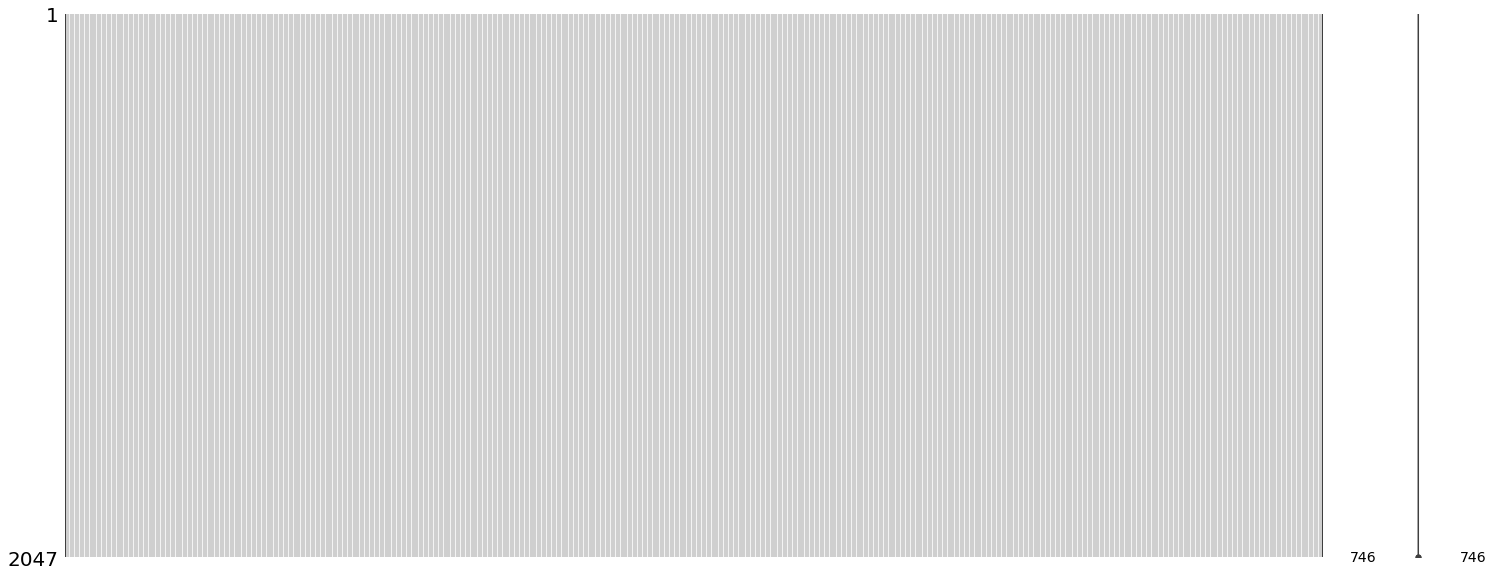

In [49]:
msno.matrix(df_temperatura)

### **B) Descrição dos Atributos**

<p><b>Cada linha contem um ponto de latitude e longitude localizado no meio de uma quadricula de 5km de cada lado da<br>
    Região Nordeste do Brasil, e em seguinda dos valores horário de cada dia do mês 01 (referência).
<br>
<br>Coluna 0: Longitude em Graus
<br>Coluna 1: Latitude em Graus
<br>Coluna 2: Valor da Temperatura em Graus Celsius ºC
<br>Coluna 3..746: Valor da Temperatura em Graus Celsius ºC
</b></p>



#### <span style="color:#DC143C"> **B1. Total de Dias por Linha"**

In [28]:
# [Total de Registro - (Latitude e Longitude)] / 1 (valor) / 24 ocorrencias h
print('Total de Dias por Linha: ' + str((df_temperatura.shape[1]-2)/24))

Total de Dias por Linha: 31.0


#### <span style="color:#DC143C"> **B2. Descobrindo todas as variáveis "Categoricas" e "Continuas"**

In [ ]:
categorical_col, contin_val=[],[]

for i in df_temperatura.columns:  # i = nome das colunas
   # print(i)
    if df_temperatura[i].dtype == 'object':
        categorical_col.append(i)
    else:
        contin_val.append(i)
        
print("Colunas com variaveis Categóricas: " + str(categorical_col))
print('')
print("Colunas com variaveis Contínuas: " + str(contin_val))

### **C) Alterar Formato do Shape**

In [19]:
Linha    =  df_temperatura.shape[0]  # Total de Linhas
Colunas  =  df_temperatura.shape[1]  # Total de Colunas

frente = ['Longitude', 'Latitude', 'Valor', 'Data']  # Cabeçalho
df_result_temperatura = pd.DataFrame(columns=frente)  # Criação de um dataframe vazio


#### <span style="color:#DC143C">**C1. Inicio da execução**

In [20]:
datetime.now().strftime('%Y-%m-%d %H:%M:%S')

'2021-06-20 08:42:58'

#### <span style="color:#DC143C">**C2. Lógica da Execução**

In [ ]:
refdia = 1
    
# Função para transformar .... 
for lin in range(Linha):
    print('linha: ' + str(lin))
    
    refhora = 0
    
    for col in range (Colunas):        
        if col > 1:    # Removo log e Lat da varredura
            # print(col)
            # print('Day: '  + str(refdia))    
            # print('Hora: ' + str(refhora))   
                
            data_p = datetime(year=2017, month=1, day = refdia, hour = refhora, minute=0, second=0) 
            # print(data)
                
            variavel = [df_temperatura.loc[lin,0], df_temperatura.loc[lin,1] , df_temperatura.loc[lin,col] , data_p] 
                
            df_result_temperatura.loc[-1] = variavel  # adding a row
            df_result_temperatura.index = df_result_temperatura.index + 1
                
            refhora = refhora + 1
            if refhora == 24:                    
                refdia = refdia + 1
                refhora = 0
                
    refdia = 1
    refhora = 0
    
df_result_temperatura.reset_index(inplace=True, drop=False)  #Reseto o indice

#### <span style="color:#DC143C">**C3. Fim da execução**

In [ ]:
datetime.now().strftime('%Y-%m-%d %H:%M:%S') 

### **D. Exporta Resultados**

In [ ]:
# df_ajustepressao.head()

In [ ]:
df_result_temperatura.drop('index',axis='columns', inplace=True)

In [ ]:
df_result_temperatura.to_csv(output_file, sep=';', header=False, index = False, encoding='utf-8')